In [1]:
from smote_oversample import *

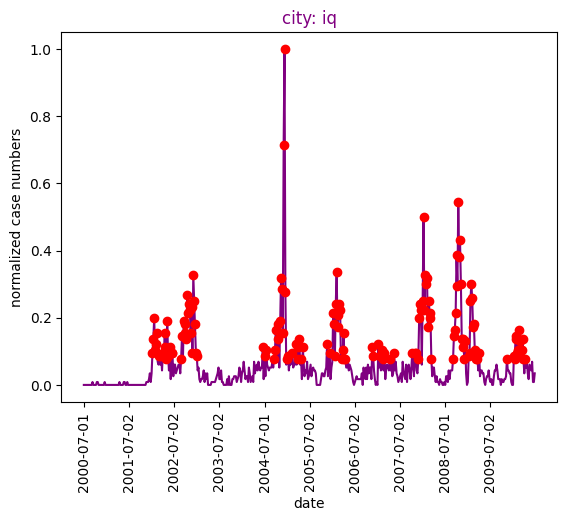

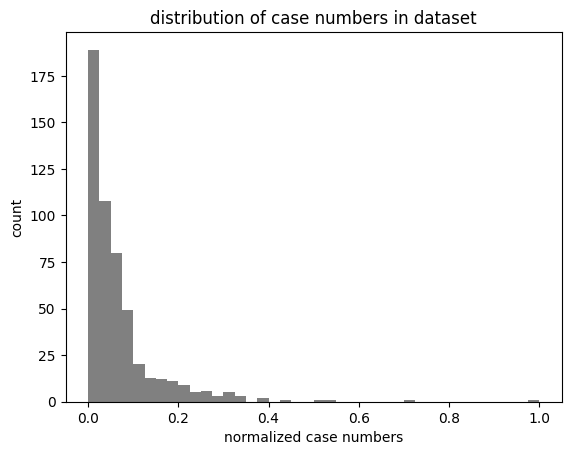

/Users/jean/WORK/DSR_2022_b32/mini_competition/dengai-undisease/smote_oversample.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_X_Y.loc[:, categorical_features] = cat_encoder.fit_transform(
/Users/jean/WORK/DSR_2022_b32/mini_competition/dengai-undisease/smote_oversample.py:112: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  combined_X_Y.loc[:, categorical_features] = cat_encoder.fit_transform(


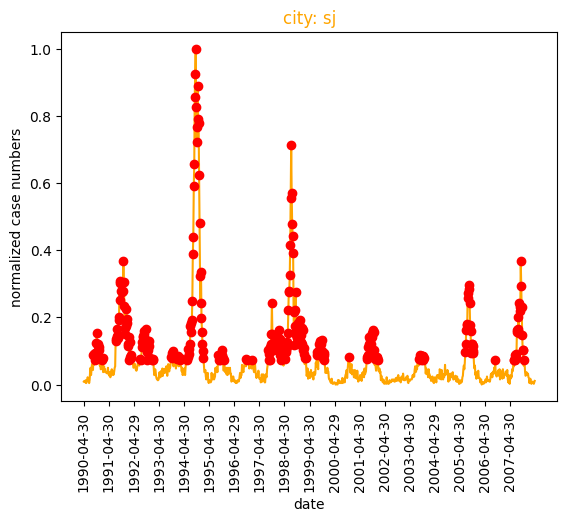

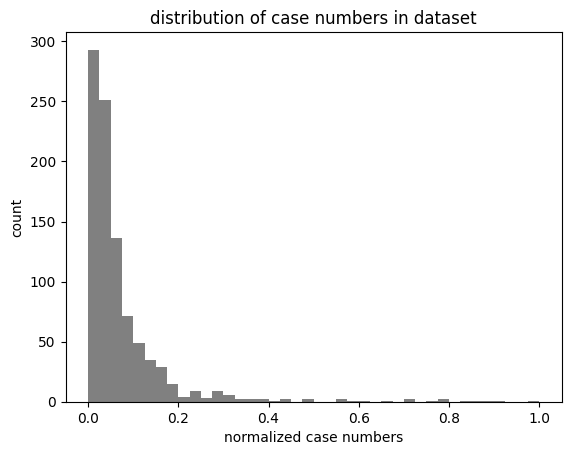

/Users/jean/WORK/DSR_2022_b32/mini_competition/dengai-undisease/smote_oversample.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_X_Y.loc[:, categorical_features] = cat_encoder.fit_transform(
/Users/jean/WORK/DSR_2022_b32/mini_competition/dengai-undisease/smote_oversample.py:112: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  combined_X_Y.loc[:, categorical_features] = cat_encoder.fit_transform(


In [2]:
X_upsampled, Y_upsampled = smote_oversample_run_all()
# print(X_upsampled.head())
# print(Y_upsampled.head())

In [3]:
import numpy as np
import pandas as pd
official_trainX_ori= pd.read_csv("./data/dengue_features_train.csv")
official_trainY_ori = pd.read_csv("./data/dengue_labels_train.csv")
official_trainX = X_upsampled
official_trainY = Y_upsampled

official_trainX_ori.shape

(1456, 24)

In [7]:

pop_sj = 23.50000 # to normalized per 100 000 inhabitants
pop_iq = 5.10000 # to normalized per 100 000 inhabitants

last_index_sj = sum(official_trainX.city == "sj")
last_index_iq = sum(official_trainX.city == "iq")
split_sj = round(0.7*last_index_sj)
split_iq = round(0.7*last_index_iq)
sj_official_trainX= official_trainX[official_trainX.city == "sj"]
iq_official_trainX= official_trainX[official_trainX.city == "iq"]

sj_len_X=len(sj_official_trainX)
iq_len_X=len(iq_official_trainX)

sj_trainX=sj_official_trainX[:split_sj]
iq_trainX=iq_official_trainX[:split_iq]

sj_testX=sj_official_trainX[split_sj:]
iq_testX=iq_official_trainX[split_iq:]

sj_official_trainY= official_trainY[official_trainY.city == "sj"]
iq_official_trainY= official_trainY[official_trainY.city == "iq"]

sj_len_Y=len(sj_official_trainY)
iq_len_Y=len(sj_official_trainY)

sj_trainY=sj_official_trainY[:split_sj]
iq_trainY=iq_official_trainY[:split_iq]

sj_testY=sj_official_trainY[split_sj:]
iq_testY=iq_official_trainY[split_iq:]

trainX = pd.concat((sj_trainX, iq_trainX), axis=0)
trainY = pd.concat((sj_trainY, iq_trainY), axis=0)
testX = pd.concat((sj_testX, iq_testX), axis=0)
testY = pd.concat((sj_testY, iq_testY), axis=0)

# trainX.head(),trainY.head()



In [15]:
last_index_sj = sum(official_trainX.city == "sj")
last_index_sj

1144

In [9]:
sj_official_trainY, iq_official_trainY

(     city    year  weekofyear  total_cases
 659    sj  1990.0        18.0          4.0
 660    sj  1990.0        19.0          5.0
 661    sj  1990.0        20.0          4.0
 662    sj  1990.0        21.0          3.0
 663    sj  1990.0        22.0          6.0
 ...   ...     ...         ...          ...
 1798   sj  2008.0        13.0          4.0
 1799   sj  2008.0        14.0          3.0
 1800   sj  2008.0        15.0          1.0
 1801   sj  2008.0        16.0          3.0
 1802   sj  2008.0        17.0          5.0
 
 [1144 rows x 4 columns],
     city    year  weekofyear  total_cases
 0     iq  2000.0        26.0          0.0
 1     iq  2000.0        27.0          0.0
 2     iq  2000.0        28.0          0.0
 3     iq  2000.0        29.0          0.0
 4     iq  2000.0        30.0          0.0
 ..   ...     ...         ...          ...
 654   iq  2010.0        22.0          8.0
 655   iq  2010.0        23.0          1.0
 656   iq  2010.0        24.0          1.0
 657   iq  201

In [10]:
#check data alignment
np.corrcoef(np.array(trainX.weekofyear), np.array(trainY.iloc[:,2]))

array([[1., 1.],
       [1., 1.]])

In [11]:
#check duplicates
print(f' trainX duplicates? {trainX.duplicated().unique()}')
print(f' trainY duplicates? {trainY.duplicated().unique()}')

 trainX duplicates? [False]
 trainY duplicates? [False]


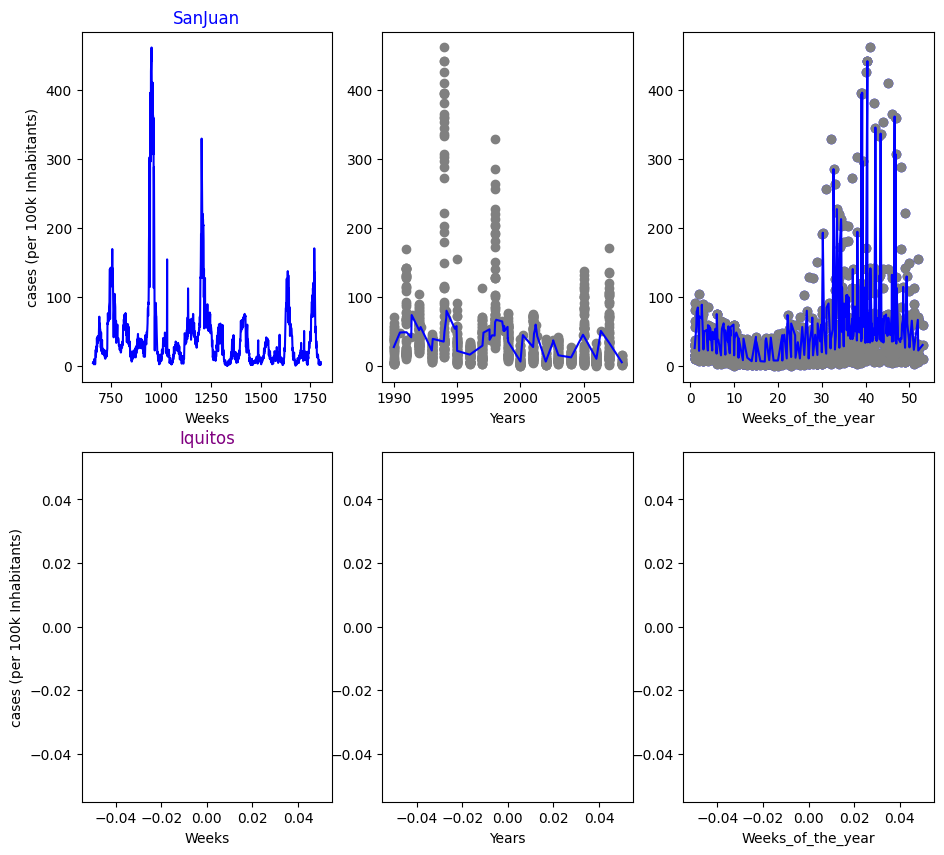

In [12]:
#how did the epidemic evolved over time
#separate plots by city
#numbers normalized by 100k inhabitants

import matplotlib.pyplot as plt
#pop_sj = 23.50000 # to normalized per 100 000 inhabitants
#pop_iq = 5.10000 # to normalized per 100 000 inhabitants
pop_sj = 1 # to normalized per 100 000 inhabitants
pop_iq = 1 # to normalized per 100 000 inhabitants
pops = [pop_sj, pop_iq]
cities = ['SanJuan', 'Iquitos']
cities_data = dict(SanJuan=sj_trainY, Iquitos=iq_trainY)
axes_cit = [[0, 0], [1,0]]
cities_color = ['blue', 'purple']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(11, 10))
for ct in range(len(cities)):
    thisrow = axes_cit[ct][0]
    thiscol = axes_cit[ct][1]
    axs[thisrow, 0].plot(
        cities_data[cities[ct]].iloc[:,3]/pops[ct],
        color=cities_color[ct])

    #plot for the all duration
    axs[thisrow, 2].scatter(
        cities_data[cities[ct]].loc[:,'weekofyear'],
        cities_data[cities[ct]].loc[:,'total_cases']/pops[ct],
        marker='o',
        color=cities_color[ct])

    #plot per year
    axs[thisrow, 1].scatter(
        cities_data[cities[ct]].iloc[:,1],
        cities_data[cities[ct]].iloc[:,3]/pops[ct],
        marker='o',
        color='grey')
    axs[thisrow, 1].plot(
        cities_data[cities[ct]].groupby('year')['total_cases'].median().index,
        cities_data[cities[ct]].groupby('year')['total_cases'].median()/pops[ct], 
        color=cities_color[ct])
    
    #plot per week of the year
    axs[thisrow, 2].scatter(
        cities_data[cities[ct]].loc[:,'weekofyear'],
        cities_data[cities[ct]].loc[:,'total_cases']/pops[ct],
        marker='o',
        color='grey')
    axs[thisrow, 2].plot(
        cities_data[cities[ct]].groupby('weekofyear')['total_cases'].median().index,
        cities_data[cities[ct]].groupby('weekofyear')['total_cases'].median()/pops[ct], 
        color=cities_color[ct])

    axs[thisrow, 0].set_ylabel('cases (per 100k Inhabitants)')
    axs[thisrow, 0].set_title(cities[ct], color=cities_color[ct])
    axs[thisrow, 0].set_xlabel('Weeks')
    axs[thisrow, 2].set_xlabel('Weeks_of_the_year')
    axs[thisrow, 1].set_xlabel('Years')  

plt.savefig('Epidemic_Evolution_0ver_time.png', orientation='landscape', transparent=False)


There is a clear yearly seasonality in San Juan but it is not as obvious in Iquitos \
Season clearly matters, the epidemics seems to vary with seasons (more in summer)

In [ ]:
trainX.describe().T

In [ ]:
#how many nans per columns
trainX.isnull().sum()

In [ ]:
#getting rid of rows with nans
# trainX = trainX.dropna()
# trainY = trainY.loc[trainX.index]
# target = trainY.iloc[:,3]
# print(trainX.isnull().any().any())
# print(trainY.isnull().any().any())
# print(f'trainX shape: {trainX.shape} - trainY shape: {trainY.shape}')

In [ ]:
data_select_col = ['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']

import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer 
from sklearn.impute import SimpleImputer, KNNImputer
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
import seaborn as sns

all_numerical_features = trainX.select_dtypes(include = ['int64', 'float64']).columns
all_categorical_features = trainX.select_dtypes(include = [object, 'datetime64']).columns

numerical_features = [value for value in all_numerical_features if value in data_select_col]
categorical_features = [value for value in all_categorical_features if value in data_select_col]
categorical_features, numerical_features
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)), 
    ('scaler', StandardScaler())])
#Quantile encoding for categorical columns
#cat_enc = ce.count.CountEncoder()
# cat_enc = ce.QuantileEncoder()
# cat_enc = ce.hashing.HashingEncoder() ### NONONO 
# cat_enc = ce.james_stein.JamesSteinEncoder()
# cat_enc = ce.target_encoder.TargetEncoder()
cat_enc = ce.one_hot.OneHotEncoder()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', cat_enc)])
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numerical_features),
                  ('cat', categorical_transformer, categorical_features)], 
    remainder='passthrough' # to let everything not trasnformed go through
)


In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
cc_map = sns.heatmap(trainX.corr(method='spearman',numeric_only=True), ax=ax)
# SellerG and CouncilArea are quite correlated
# Type and Room are quite correlated
ax.set_title('Feature Cross Correlation')
ax.set_aspect('equal')
plt.savefig('CrossCorrelationMatrix_AllNumFeatures.png', orientation='landscape', transparent=False)

plt.show()

In [ ]:

#import packages
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor, HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
# from sklearn.neural_network import MLPRegressor

regressors = [
    # Ridge(),
    # ElasticNet(),
    # Lasso(),
    # DecisionTreeRegressor(),
    # ExtraTreeRegressor(),    
    RandomForestRegressor(),
    # AdaBoostRegressor(),
    # BaggingRegressor(),
    # LinearSVR(), 
    # HistGradientBoostingRegressor(),
    # KNeighborsRegressor(n_neighbors=4),
    ]

Y_train = trainY.loc[:,'total_cases']
Y_test = testY.loc[:,'total_cases']

pop_sj = 23.50000 # to normalized per 100 000 inhabitants
pop_iq = 5.10000 # to normalized per 100 000 inhabitants
pops = [pop_sj, pop_iq]
cities = ['sj', 'iq']
axes_cit = [[0, 0], [1,0]]
cities_color = ['blue', 'purple']

for regressor in regressors:
    #model pipeline
    print(regressor)
    reg_pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', regressor)]
    )
    # print(lin_reg_pipe)
    
    reg_pipe.fit(trainX.loc[:,data_select_col], Y_train)
    y_pred = reg_pipe.predict(testX.loc[:,data_select_col])
    y_train_pred = reg_pipe.predict(trainX.loc[:,data_select_col])
    # print('Mean Abs Percentage error = ', mean_absolute_percentage_error(y_test, y_pred))
    print(f'TRAIN - MAE =  {mean_absolute_error(Y_train, y_train_pred)}')
    print(f'TEST - MAE =  {mean_absolute_error(Y_test, y_pred)}')
    # print('TEST - Explained Variance = %.3f' % explained_variance_score(testY, y_pred))
    # print('Rˆ2 = ' ,r2_score(y_test, y_pred))
    # ct.fit_transform(ce_target.fit_transform(X_train, y_train), y_train)

    fig = plt.subplots(figsize=(12,18))
    
    for ct in range(len(cities)):
            
        #train
        city_data_log_train = trainY.loc[:,'city']==cities[ct]
        year_train = trainY.loc[city_data_log_train,'year']
        week_train = trainY.loc[city_data_log_train,'weekofyear']
        # print(zip(np.array(year), np.array(week)))
        time_train=[f'y{y}w{w}' for y, w in zip(np.array(year_train), np.array(week_train))]

        #test
        city_data_log = testY.loc[:,'city']==cities[ct]
        year_test = testY.loc[city_data_log,'year']
        week_test = testY.loc[city_data_log,'weekofyear']
        # print(zip(np.array(year), np.array(week)))
        time_test=[f'y{y}w{w}' for y, w in zip(np.array(year_test), np.array(week_test))]

        # real Y versus prediction Y on TRAIN X
        ax_1_t = plt.subplot(5,2,1)
        ax_1_t.scatter(
            Y_train[city_data_log_train], y_train_pred[city_data_log_train], 
            marker='o', 
            color=cities_color[ct])
        ax_1 = plt.subplot(5,1,2+ct*2)
        ax_1.scatter(time_train, np.array(Y_train[city_data_log_train]), marker='o',color='grey')
        ax_1.plot(time_train, y_train_pred[city_data_log_train], color=cities_color[ct])
        ax_1.set_ylabel('Total Cases')
        ax_1.set_xlabel('Time')
        ax_1.set_title('TRAINING')
        x_ti = [time_train[l] for l in range(0,len(time_train),6)]
        ax_1.set_xticks(x_ti) 
        ax_1.set_xticklabels(x_ti,
            rotation='vertical')
            
        # real Y versus prediction Y on TEST X
        ax_1_tt = plt.subplot(5,2,2)
        ax_1_tt.scatter(
            Y_test[city_data_log], y_pred[city_data_log], 
            marker='o', 
            color=cities_color[ct])

        ax_2 = plt.subplot(5,1,3+ct*2)
        ax_2.scatter(time_test, np.array(Y_test[city_data_log]), marker='o',color='grey')
        ax_2.plot(time_test, y_pred[city_data_log], color=cities_color[ct])
        ax_2.set_ylabel('Total Cases')
        ax_2.set_xlabel('Time')
        ax_2.set_title('TESTING')
        x_ti = [time_test[l] for l in range(0,len(time_test),6)]
        ax_2.set_xticks(x_ti) 
        ax_2.set_xticklabels(x_ti,
            rotation='vertical')
        # ax1[1+ct].xticks(rotation='vertical')
  


    axlims = []
    [axlims.append(a) for a in ax_1_t.get_xlim()];
    [axlims.append(a) for a in ax_1_t.get_ylim()];
    [axlims.append(a) for a in ax_1_tt.get_xlim()];
    [axlims.append(a) for a in ax_1_tt.get_ylim()];

    ax_1_t.set_xlim(min(axlims), max(axlims))
    ax_1_t.set_ylim(min(axlims), max(axlims))
    line = [[min(axlims), min(axlims)],
        [max(axlims), max(axlims)]]
    ax_1_t.plot(line, line, linestyle='--', color='red')
    ax_1_t.grid(True)
    ax_1_t.set_aspect('equal')
    ax_1_t.set_ylabel('Prediction')
    ax_1_t.set_xlabel('Real')
    title = (f' regressor - TRAIN MAE = %.2f' % mean_absolute_error(Y_train, y_train_pred))
    ax_1_t.set_title(title)
    ax_1_t.set_ylim(min(axlims), max(axlims))

    ax_1_tt.set_xlim(min(axlims), max(axlims))
    ax_1_tt.set_ylim(min(axlims), max(axlims))
    line = [[min(axlims), min(axlims)],
        [max(axlims), max(axlims)]]
    ax_1_tt.plot(line, line, linestyle='--', color='red')
    ax_1_tt.grid(True)
    ax_1_tt.set_aspect('equal')
    ax_1_tt.set_ylabel('Prediction')
    ax_1_tt.set_xlabel('Real')
    title = (f' regressor - TEST MAE = %.2f' % mean_absolute_error(Y_test, y_pred))
    # print('TEST - Explained Variance = %.3f' % explained_variance_score(y_test, y_pred))
    ax_1_tt.set_title(title)
    ax_1_tt.set_ylim(min(axlims), max(axlims))

    for ct in range(len(cities)):
        ax_1 = plt.subplot(5,1,2+ct*2)
        ax_1.set_ylim(min(axlims), max(axlims))
        ax_2 = plt.subplot(5,1,3+ct*2)
        ax_2.set_ylim(min(axlims), max(axlims))

    plt.tight_layout()
    plt.savefig(f'fit_prediction_vs_real_{regressor}.png', orientation='landscape', transparent=False)
    plt.show()

